<h1>Imports</h1>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from dieboldmariano import dm_test
from preps import (create_dataset, finalize_dataset, predict_brt, calculate_amb_var)

<h1>Simulation and plotting</h1>

Completion: 0.0% 

Completion: 0.28935185185185186% 

Completion: 0.5787037037037037% 

Completion: 0.8680555555555556% 



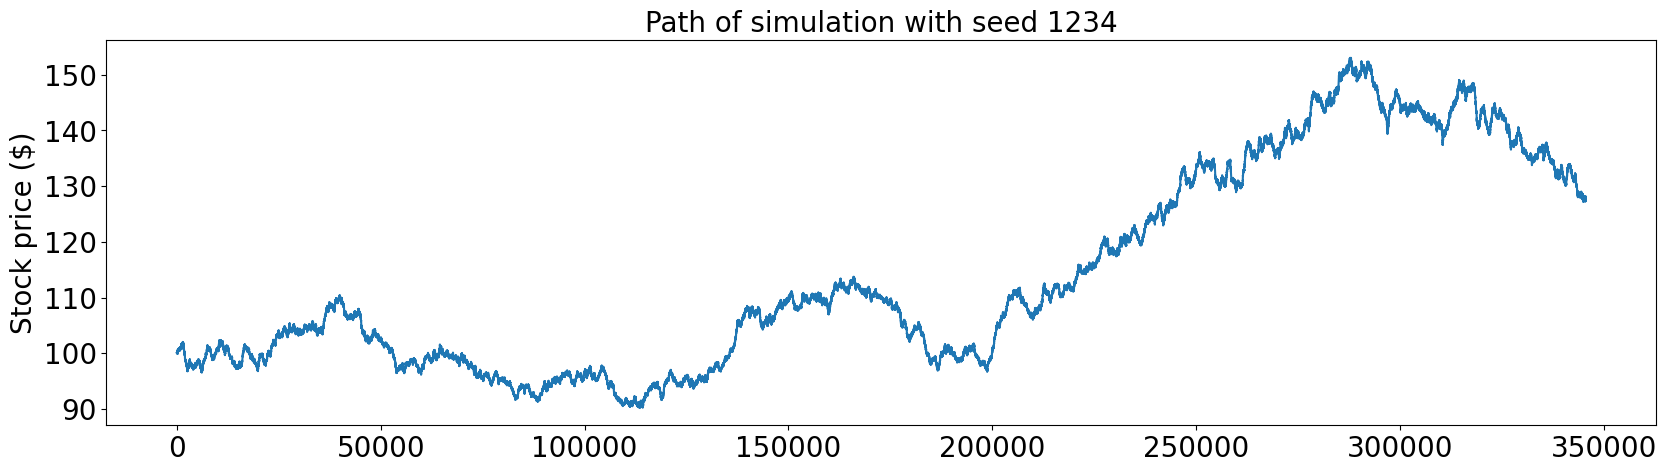

In [12]:
relative_returns, data = create_dataset()

data['STOCK_PRICE'].plot(figsize=(20, 5), fontsize=20)
plt.title('Path of simulation with seed 1234', fontsize=20)
plt.ylabel('Stock price ($)', fontsize=20)
plt.savefig('path.jpg')

<h1>Analysis</h1>

In [3]:
brt_values = pd.read_csv('brt_values.csv').values[:, 1]
finalized = finalize_dataset(relative_returns, brt_len=120, window_len=200, pre_calculated=brt_values)
predicted = predict_brt(finalized, 0.7)
amb_var_set = calculate_amb_var(predicted)

<h1>Performance evaluation</h1>

In [15]:
test = dm_test(amb_var_set['VAR_tomorrow'], amb_var_set['amb_var'], amb_var_set['EVT_tomorrow'], one_sided=True)
print(f'The proposed methodology is significantly superior with p-value of: {round(test[1],3)}')

The proposed methodology is significantly superior with p-value of: 0.023
